<a href="https://colab.research.google.com/github/mbparsons/code/blob/master/Cleaning_up_ad_spend_time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
data = 'drive/My Drive/Colab Notebooks/mercedesbenz.adspend.csv'
mb = pd.read_csv(data)

In [0]:
mb['TIME PERIOD'] = mb['TIME PERIOD'].str.replace("WEEK OF\ ","") 

In [0]:
mb['TIME PERIOD'] = mb['TIME PERIOD'].str.replace("\ \(B\)","") 

In [0]:
mb['TIME PERIOD'] = pd.to_datetime(mb['TIME PERIOD'])

In [0]:
mb.columns = mb.columns.str.replace("\ DOLS \(000\)","")

In [0]:
mb

,TIME PERIOD,PRODUCT,TOTAL,NETWORK TV,CABLE TV,SYNDICATION,SPOT TV,MAGAZINES,SUNDAY MAGS,NATL NEWSP,NEWSPAPER,NETWORK RADIO,NAT SPOT RADIO,OUTDOOR
0,2013-10-07,Mercedes Benz CLA : European Passenger Auto,4464.1,887.6,1161.2,0.0,2129.0,286.4,0.0,0.0,0.0,0.0,0.0,0.0
1,2013-10-07,Mercedes Benz CLA250 : European Passenger Auto,1196.5,426.2,770.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2013-10-07,Mercedes Benz CLA250 Leasing : European Passen...,0.1,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2013-10-07,Mercedes Benz Full Line : Various European Aut...,30.2,0.0,0.0,0.0,1.1,0.0,0.0,0.0,0.0,28.8,0.2,0.0
4,2013-10-07,Mercedes Benz Full Line Pre-Owned : Various Eu...,37.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,2018-10-01,Mercedes Benz Full Line : Corporate Promotion,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0
3452,2018-10-01,Mercedes Benz Full Line : Various European Aut...,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1,0.0
3453,2018-10-01,Mercedes Benz GLC : European SUV,1047.9,932.8,115.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3454,2018-10-01,Mercedes Benz GLC300 Leasing : European SUV,5.3,0.0,5.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
timedata = pd.pivot_table(mb,index=["TIME PERIOD"],values=['TOTAL','NETWORK TV','CABLE TV','SYNDICATION','SPOT TV','MAGAZINES','SUNDAY MAGS','NATL NEWSP','NEWSPAPER','NETWORK RADIO','NAT SPOT RADIO','OUTDOOR'],aggfunc=np.sum)

In [0]:
timedata

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,SYNDICATION,TOTAL
TIME PERIOD,,,,,,,,,,,,
2013-10-07,1942.7,1058.2,0.2,0.0,65.9,1313.8,0.0,0.0,2130.2,0.0,0.0,6511.0
2013-10-14,2151.5,49.8,0.2,475.5,65.9,3855.3,0.0,0.0,1210.9,0.0,0.0,7809.1
2013-10-21,2076.5,705.3,0.2,0.0,65.9,2860.4,0.0,0.0,1822.7,0.0,0.0,7531.2
2013-10-28,2089.9,3400.3,0.4,0.0,67.6,4891.6,6.7,181.6,1669.5,0.0,2.0,12309.6
2013-11-04,484.1,356.0,0.6,0.0,69.9,4014.6,0.0,0.0,10.0,0.0,0.0,4935.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-03,1332.5,0.0,0.3,0.0,63.7,6962.8,0.0,0.0,0.0,0.0,0.0,8359.3
2018-09-10,1370.0,0.0,0.3,0.0,63.7,3112.8,0.0,0.0,26.9,0.0,0.0,4573.7
2018-09-17,2126.9,0.0,0.3,0.0,63.7,1213.6,0.0,0.0,175.2,0.0,0.0,3579.7


Text(0.5, 1.0, 'TOTAL')

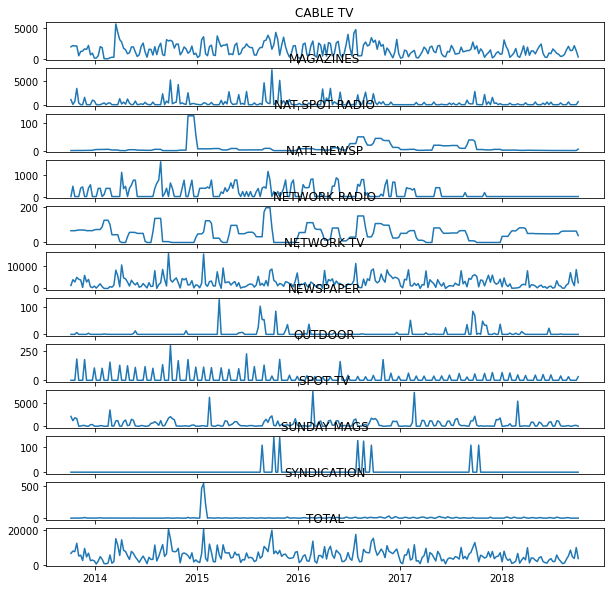

In [0]:
import matplotlib.pyplot as pyplot
dimensions = (10, 10)
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12) = pyplot.subplots(12, figsize=dimensions, sharex='all')
ax1.plot(timedata.index, timedata['CABLE TV'])
ax1.set_title('CABLE TV')
ax2.plot(timedata.index, timedata['MAGAZINES'])
ax2.set_title('MAGAZINES')
ax3.plot(timedata.index, timedata['NAT SPOT RADIO'])
ax3.set_title('NAT SPOT RADIO')
ax4.plot(timedata.index, timedata['NATL NEWSP'])
ax4.set_title('NATL NEWSP')
ax5.plot(timedata.index, timedata['NETWORK RADIO'])
ax5.set_title('NETWORK RADIO')
ax6.plot(timedata.index, timedata['NETWORK TV'])
ax6.set_title('NETWORK TV')
ax7.plot(timedata.index, timedata['NEWSPAPER'])
ax7.set_title('NEWSPAPER')
ax8.plot(timedata.index, timedata['OUTDOOR'])
ax8.set_title('OUTDOOR')
ax9.plot(timedata.index, timedata['SPOT TV'])
ax9.set_title('SPOT TV')
ax10.plot(timedata.index, timedata['SUNDAY MAGS'])
ax10.set_title('SUNDAY MAGS')
ax11.plot(timedata.index, timedata['SYNDICATION'])
ax11.set_title('SYNDICATION')
ax12.plot(timedata.index, timedata['TOTAL'])
ax12.set_title('TOTAL')

1. Magazines, newspapers, Sunday magazines, and national spot radio share seasonality because people are writing and talking about the new cars that are just released in November, and Mercedes wants to buy ads in those magazines, newspapers, and talk shows to encourage people to buy their new cars.
2. Mercedes spends more money during the summer when they release the concepts of next versions of cars at auto shows and during the end of the year leading up to Christmas. This is because in June cars release their new models that can be preordered, and cars are actually released in November, which leads to more advertising in June and November.